In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
df = pd.read_csv('/content/Expanded_data_with_more_features.csv')


In [9]:
df.describe()

,hours_studied,sleep_hours,attendance_percent,previous_scores,exam_score
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,6.325500,6.622000,74.830000,66.800000,33.955000
std,3.227317,1.497138,14.249905,15.663869,6.789548
min,1.000000,4.000000,50.300000,40.000000,17.100000
25%,3.500000,5.300000,62.200000,54.000000,29.500000
50%,6.150000,6.700000,75.250000,67.500000,34.050000
75%,9.000000,8.025000,87.425000,80.000000,38.750000
max,12.000000,9.000000,100.000000,95.000000,51.300000


In [15]:
df.shape

(30641, 15)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           30641 non-null  int64  
 1   Gender               30641 non-null  object 
 2   EthnicGroup          28801 non-null  object 
 3   ParentEduc           28796 non-null  object 
 4   LunchType            30641 non-null  object 
 5   TestPrep             28811 non-null  object 
 6   ParentMaritalStatus  29451 non-null  object 
 7   PracticeSport        30010 non-null  object 
 8   IsFirstChild         29737 non-null  object 
 9   NrSiblings           29069 non-null  float64
 10  TransportMeans       27507 non-null  object 
 11  WklyStudyHours       29686 non-null  object 
 12  MathScore            30641 non-null  int64  
 13  ReadingScore         30641 non-null  int64  
 14  WritingScore         30641 non-null  int64  
dtypes: float64(1), int64(4), object(10)


In [17]:
df.isnull().sum()

,0
Unnamed: 0,0
Gender,0
EthnicGroup,1840
ParentEduc,1845
LunchType,0
TestPrep,1830
ParentMaritalStatus,1190
PracticeSport,631
IsFirstChild,904
NrSiblings,1572


In [18]:
df = df.drop(['Unnamed: 0'], axis=1)

In [24]:
df['WklyStudyHours'] = df['WklyStudyHours'].str.replace('Oct 5', '6')
df.head()

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75


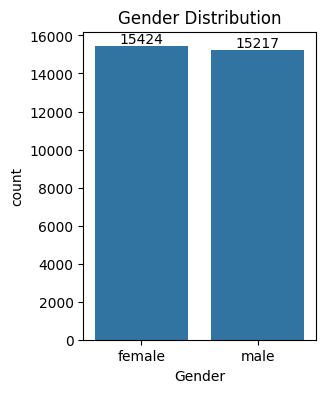

In [44]:
plt.figure(figsize=(3,4))
ax = sns.countplot(data =df, x = 'Gender')
ax.bar_label(ax.containers[0])
plt.title("Gender Distribution")
plt.show()

From the the above chart we have analyse that the number of female is greater then male

In [47]:
gb = df.groupby('ParentEduc').agg({'MathScore': 'mean','ReadingScore': 'mean','WritingScore':'mean' })

gb

,MathScore,ReadingScore,WritingScore
ParentEduc,,,
associate's degree,68.365586,71.124324,70.299099
bachelor's degree,70.466627,73.062020,73.331069
high school,64.435731,67.213997,65.421136
master's degree,72.336134,75.832921,76.356896
some college,66.390472,69.179708,68.501432
some high school,62.584013,65.510785,63.632409


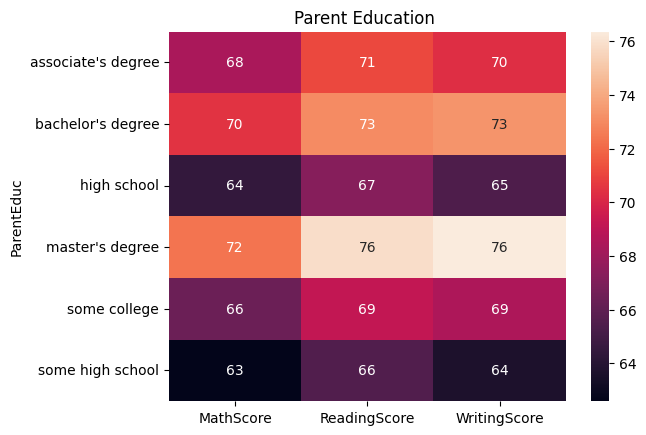

In [50]:
sns.heatmap(gb, annot = True)
plt.title("Parent Education ")
plt.show()

#From the Above charrt we conclude that the education of parents have a good  impact on student marks

In [42]:
gp = df.groupby('ParentMaritalStatus').agg({'MathScore': 'mean','ReadingScore': 'mean','WritingScore':'mean' })
gp

,MathScore,ReadingScore,WritingScore
ParentMaritalStatus,,,
divorced,66.691197,69.655011,68.799146
married,66.657326,69.389575,68.420981
single,66.165704,69.157250,68.174440
widowed,67.368866,69.651438,68.563452


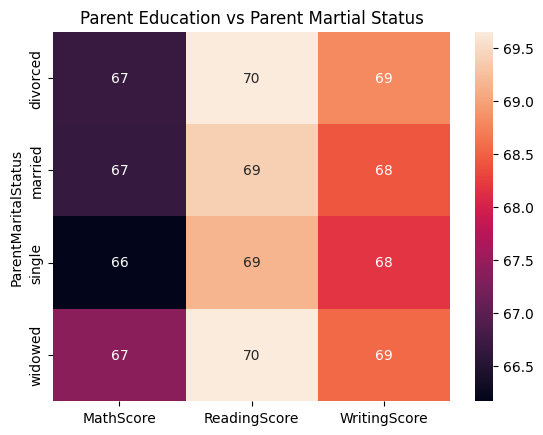

In [49]:
sns.heatmap(gp, annot = True)
plt.title("Parent Education vs Parent Martial Status")
plt.show()

NO major difference between parentEdu and parentmaritalstatus

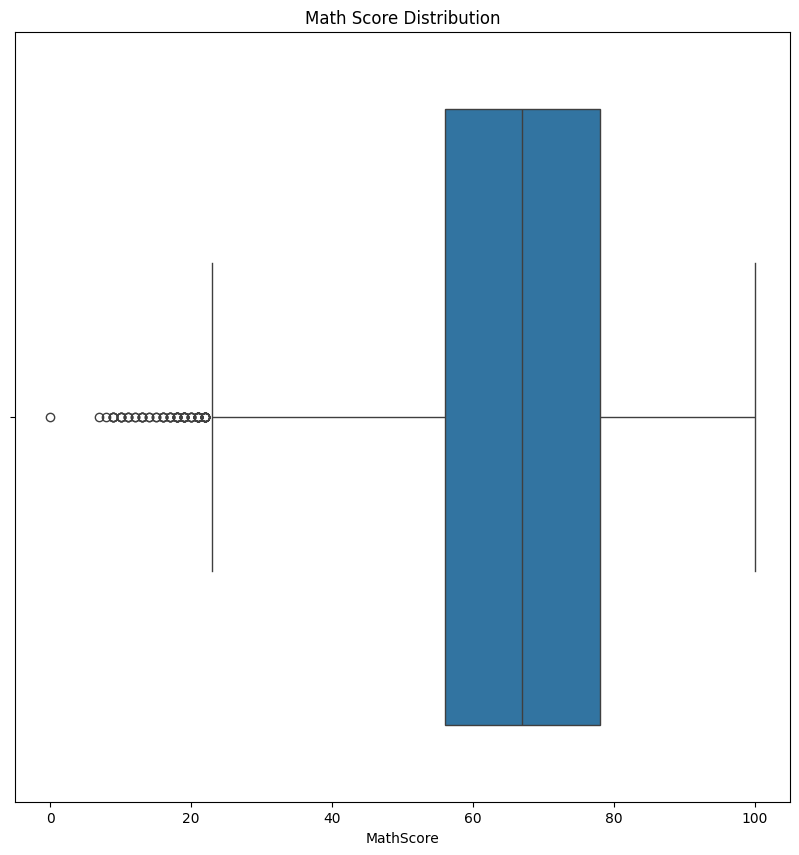

In [53]:
figure = plt.figure( figsize=(10,10))
sns.boxplot(data = df, x = 'MathScore')
plt.title("Math Score Distribution")
plt.show()

Boxplot shows is there any outliers are there in data

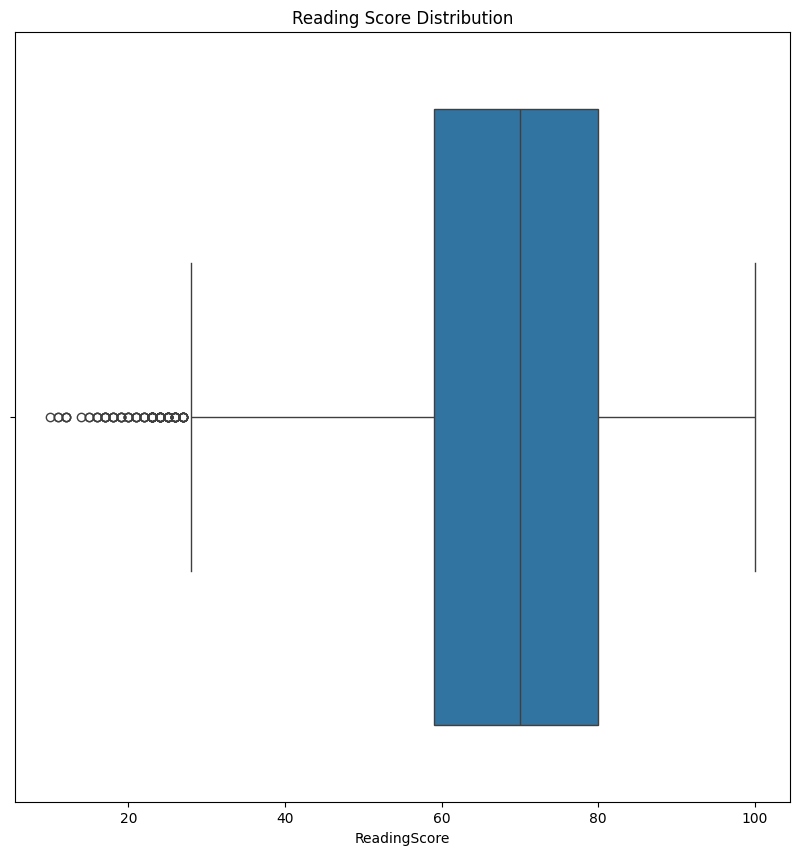

In [55]:
figure = plt.figure( figsize=(10,10))
sns.boxplot(data = df, x = 'ReadingScore')
plt.title("Reading Score Distribution")
plt.show()

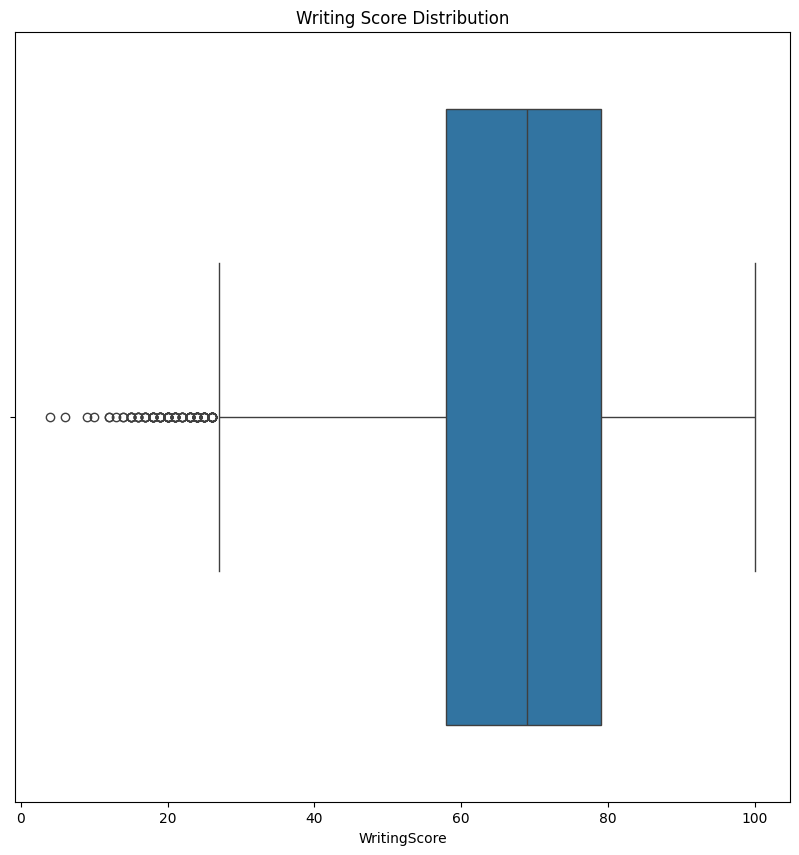

In [56]:
figure = plt.figure( figsize=(10,10))
sns.boxplot(data = df, x = 'WritingScore')
plt.title("Writing Score Distribution")
plt.show()

In [58]:
print(df['EthnicGroup'].unique())

[nan 'group C' 'group B' 'group A' 'group D' 'group E']


Distribution of Ethnic Group

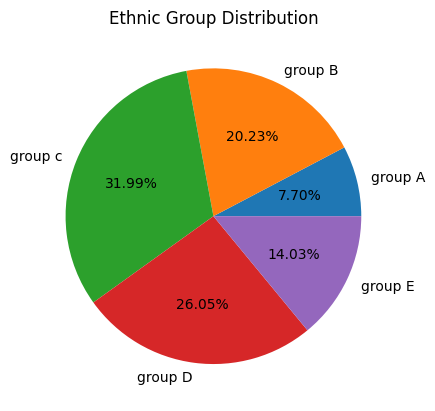

In [78]:
groupA = df[df['EthnicGroup'] == 'group A'].count()
groupB = df[df['EthnicGroup'] == 'group B'].count()
groupC = df[df['EthnicGroup'] == 'group C'].count()
groupD = df[df['EthnicGroup'] == 'group D'].count()
groupE = df[df['EthnicGroup'] == 'group E'].count()

l = ["group A", "group B", "group c", "group D", "group E"]
mlist = [groupA['EthnicGroup'], groupB['EthnicGroup'], groupC['EthnicGroup'], groupD['EthnicGroup'], groupE['EthnicGroup']]
plt.pie(mlist, labels = l, autopct= "%1.2f%%")
plt.title("Ethnic Group Distribution")
plt.show()

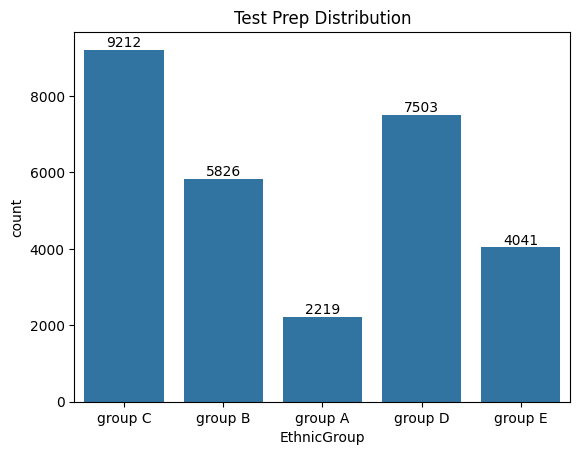

In [80]:
ax = sns.countplot(data =df, x = 'EthnicGroup')
ax.bar_label(ax.containers[0])
plt.title("Test Prep Distribution")
plt.show()

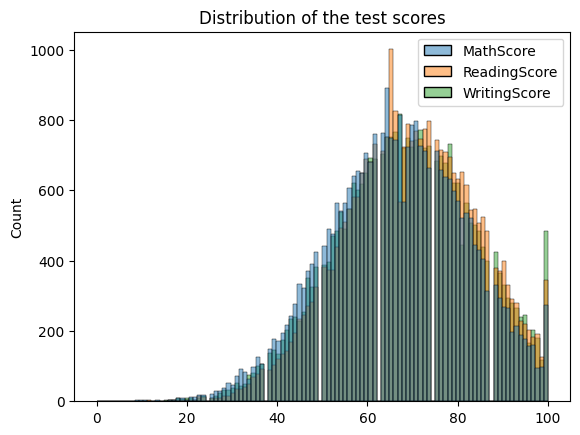

In [82]:
sns.histplot(df[['MathScore', 'ReadingScore', 'WritingScore']])
plt.title('Distribution of the test scores');